# <span style = "color:red"> Fake </span> <span style = "color:white"> news project </span>

In [66]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
#Import the file
df = pd.read_csv(r"C:\Users\MSI\Desktop\Data Science\Python\Projects\Fake news\news.csv")

#### The fundamentals

In [30]:
df.shape

(6335, 4)

In [31]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [32]:
#get labels
y = df.label
y.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

### Splitting the data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], y, test_size = 0.2, random_state = 7)

### Initialize the TfidfVectorizer

In [36]:
tfidf_vectorizer = TfidfVectorizer(stop_words= "english", max_df= 0.7) #For the english language and a maximum document frequency of 0.7

### Fit and transform (like doing standarization)

In [37]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 

tfidf_test=tfidf_vectorizer.transform(x_test)

In [38]:
train

<5068x61651 sparse matrix of type '<class 'numpy.float64'>'
	with 1337098 stored elements in Compressed Sparse Row format>

In [39]:
test

<1267x33518 sparse matrix of type '<class 'numpy.float64'>'
	with 328164 stored elements in Compressed Sparse Row format>

### Let's use the modelllll

In [40]:
pac = PassiveAggressiveClassifier(max_iter= 50) # assign the model
pac.fit(tfidf_train, y_train) #use the transformed x_train

PassiveAggressiveClassifier(max_iter=50)

###  let's predict and score

In [41]:
y_pred = pac.predict(tfidf_test)

In [42]:
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 92.82%


### Confusion Matrix and check false positives and negatives

In [44]:
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

array([[589,  49],
       [ 42, 587]], dtype=int64)

###### **<span style = "color:yellow"> We have 49 false positives (the negative class row) </span>**

Which means that news that are real are classified as fake (or fake news that are classified as real)


###### **<span style = "color:yellow"> We have 42 false negatives (the positive class row) </span>**

Which means that news that are fake  classified as real (or real news that are classified as fake)

### Better ilustrated with a graph

<AxesSubplot:>

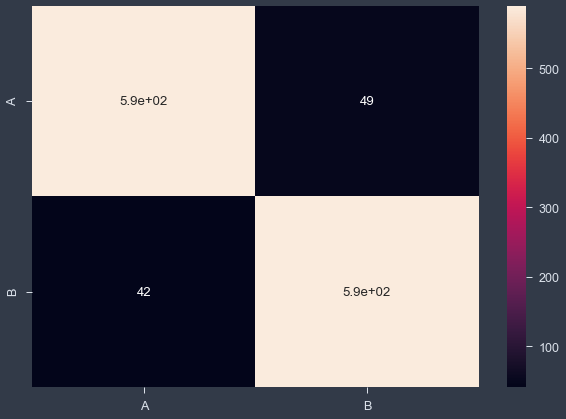

In [75]:
array = [[ 589 ,  49],
         [42, 587 ]]
df_cm = pd.DataFrame(array, index= [i for i in "AB"], columns= [i for i in "AB"])

plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot= True)

### But should we trust the accuracy?

In [52]:
from sklearn.metrics import precision_score, recall_score

In [64]:
precision = precision_score(y_test, y_pred, average="binary", pos_label="REAL")
print(f'Precision: {round(precision*100, 3)}%')

Precision: 92.296%


#####  <span style = "color:green"> Yes, we have good accuracy. The average of our real news is 92.30%   </span>

In [65]:
recall = recall_score(y_test, y_pred, average="binary", pos_label="REAL")
print(f' Recall: {round(recall*100, 2)} %')

 Recall: 93.32 %


#####  <span style = "color:green"> We also have good recall (or sensitivity). This is the ratio of positive instances that are correctly detected by the classifier wich is 93.32% </span>

## The end